In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [115]:
dataset = pd.read_excel('istanbul-1.xls', index_col='Date')
dataset.describe()

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


In [118]:
dataset.head(2)

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
Date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.03119,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773


In [45]:
dataset.isnull().sum()

ISE_TL     0
ISE_USD    0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64

In [46]:
dataset.drop_duplicates(inplace=True)

In [60]:
X = dataset.iloc[:, [1, 2]].values
X

array([[ 0.03837619, -0.00467931],
       [ 0.03181274,  0.00778674],
       [-0.02635297, -0.03046913],
       ...,
       [-0.0016526 ,  0.00192291],
       [-0.01370599, -0.02074215],
       [-0.01944185,  0.        ]])

In [104]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [110]:
wcss

[0.34493977210978694,
 0.19579948894886057,
 0.1406284228873023,
 0.11615351428492646,
 0.0975398677672534,
 0.0831690605300029,
 0.07285666459265806,
 0.06315583527655776,
 0.05681263525060738,
 0.050993169682276136]

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


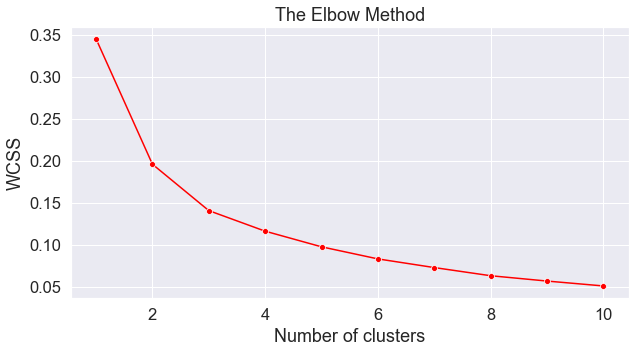

In [62]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 3, 3, 2, 3, 2, 3, 0, 1, 3, 0, 2, 2, 0, 1, 2, 1, 3, 3, 3, 1,
       2, 0, 1, 2, 3, 0, 0, 2, 3, 3, 0, 1, 3, 2, 2, 2, 0, 0, 3, 2, 2, 3,
       0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2,
       3, 1, 1, 2, 0, 0, 0, 1, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0,
       3, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 3, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 3, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 3,
       0, 1, 0, 3, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 3, 2, 0, 2, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1,
       2, 3, 2, 2, 0, 0, 2, 0, 0, 3, 3, 2, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2,
       3, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       3, 2, 0, 2, 2, 0, 2, 2, 2, 3, 3, 3, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0,
       3, 3, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0,

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


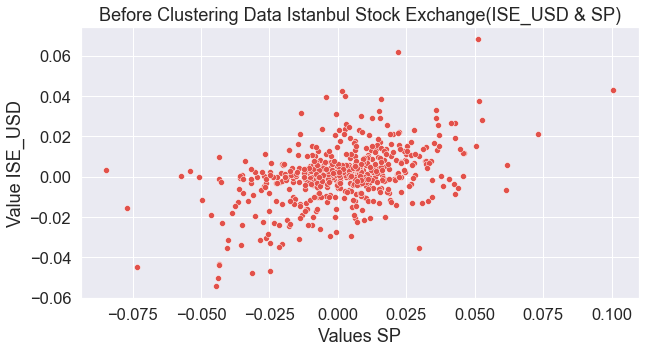

In [112]:
plt.figure(figsize=(10,5))
dataNew = pd.DataFrame.from_dict(X)
sns.scatterplot(dataNew[0], dataNew[1])
plt.title('Before Clustering Data Istanbul Stock Exchange(ISE_USD & SP)')
plt.xlabel('Values SP')
plt.ylabel('Value ISE_USD')
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-pack

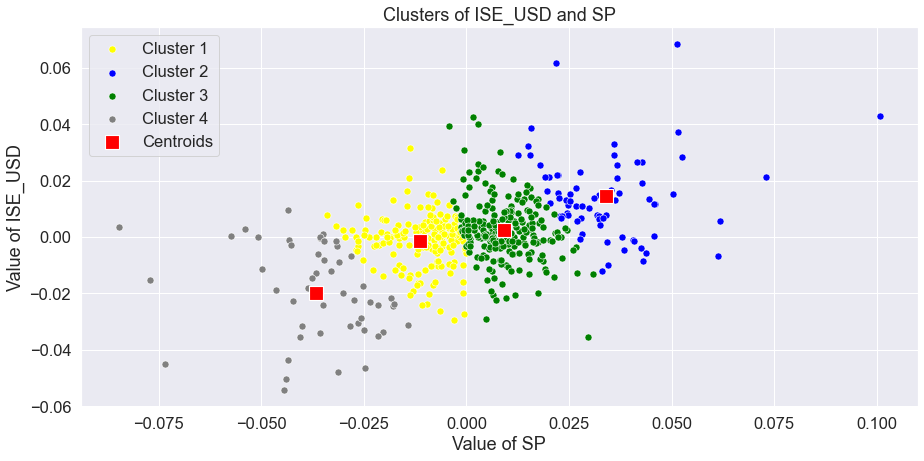

In [113]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=200,marker=',')
plt.grid(True)
plt.title('Clusters of ISE_USD and SP')
plt.xlabel('Value of SP')
plt.ylabel('Value of ISE_USD')
plt.legend()
plt.show()

In [114]:
# https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail